<a href="https://colab.research.google.com/github/xuxiufeng/Blockchain_Simulations/blob/main/Probability_Exp_and_Exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
np.random.seed(1)

In [11]:
def T_m(m, lamb, delta):
    sum_of_y = 0
    y = np.random.exponential(delta)
    sum_of_x = np.sum(np.random.exponential(lamb, m))
    while sum_of_x > y:
        sum_of_y = sum_of_y + y
        sum_of_x = np.sum(np.random.exponential(lamb, m))
        y = np.random.exponential(delta)
    return (sum_of_y + sum_of_x)

In [12]:
def P_mt1(t, m, lamb, delta, N=50000): # 50000
    res = np.repeat(np.nan, N)
    Prob = np.repeat(np.nan, len(m))
    for i in range(len(m)):
        for j in range(N):
             res[j] = t < T_m(m[i], lamb, delta)
        Prob[i] = np.sum(res)/N
    return (Prob)

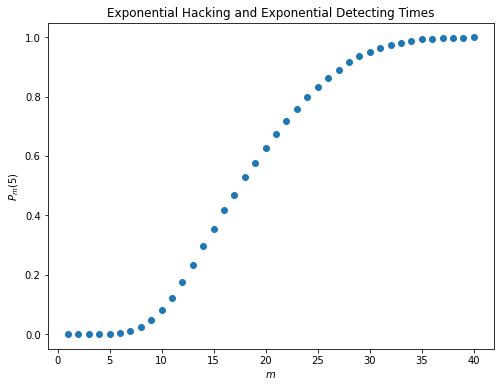

In [13]:
m = 40
lamb = 0.2 
delta = 3 
t_cross_section = 5
P_mt = P_mt1(t_cross_section, range(1, m+1), lamb, delta)
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), P_mt)
plt.xlabel(r'$m$')
plt.ylabel(r'$P_m(5)$')
plt.title('Exponential Hacking and Exponential Detecting Times')
plt.show()

# 3D

In [14]:
def P_mt2(t, m, lamb, delta, N=10000): # N: iterations 
    res = np.repeat(np.nan, N)
    for j in range(N):
        res[j] = t < T_m(m, lamb, delta)
    Prob = np.sum(res)/N
    return (Prob)

In [15]:
m = np.array(range(1, m+1))
t = np.array(np.linspace(0.1, 10, len(m)))
m_axis = np.repeat(np.nan, len(m)*len(t))
t_axis = np.repeat(np.nan, len(m)*len(t))
P_axis = np.repeat(np.nan, len(m)*len(t))
index = 0
for i in range(len(m)):
    for j in range(len(t)):
        m_axis[index] = m[i]
        t_axis[index] = t[j]
        P_axis[index] = P_mt2(t_axis[index], int(m_axis[index]), lamb, delta)
        index += 1

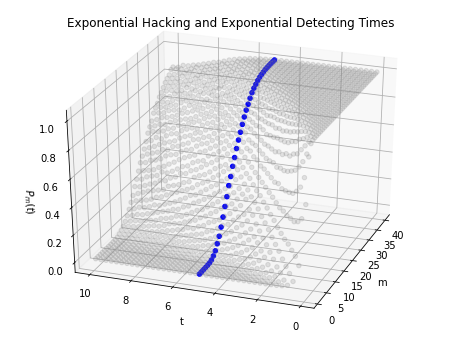

In [16]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(m_axis, t_axis, P_axis, alpha=0.2, c='grey')
ax.scatter3D(m, np.repeat(t_cross_section, len(m)), P_mt, alpha=1, c='blue')
ax.view_init(30, 200)
ax.set_yticks(np.linspace(0, 10, 6))
ax.set_xlabel('m')
ax.set_ylabel('t')
ax.set_zlabel(r'$P_m(t)$')
ax.set_title('Exponential Hacking and Exponential Detecting Times')
plt.show()